In [7]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt 
from datetime import date

In [9]:
os.getcwd()

'C:\\Users\\tdwil\\OneDrive\\Documents\\GitHub\\codeshare_geofluids\\pyexamples_28May21'

In [20]:
# read in some data
codedir = os.getcwd() # set current working (where this code is) as a variable
datadir = os.path.join(codedir, 'sitedata') # nested

fpath = os.path.join(datadir,'data_site1-2.xlsx')
df = pd.read_excel(fpath,sheet_name='Sheet1')

df1 = df[df.location == 'site1']

print(df1)

         Date Sample Labels location  Temp C  EC (mS/cm)    pH
0  2019-04-13        s1-001    site1    33.7       1.985  7.24
1  2019-05-23        s1-002    site1    33.7       1.965  7.77
2  2019-06-05        s1-003    site1    33.2       1.949  6.95
3  2019-07-12        s1-004    site1    33.1       2.080  7.06
4  2019-08-07        s1-005    site1    33.9       1.918  7.04
5  2019-09-06        s1-006    site1    33.4       1.907  7.09
6  2019-10-08        s1-007    site1    32.1       2.236  7.07
7  2019-11-07        s1-008    site1    32.0       2.209  7.17
8  2019-12-12        s1-009    site1    31.9       1.990  7.25
9  2020-01-24        s1-010    site1    31.9       2.020  7.25
10 2020-02-06        s1-011    site1    29.7       2.099  7.14
11 2020-03-05        s1-012    site1    33.1       2.070  7.16


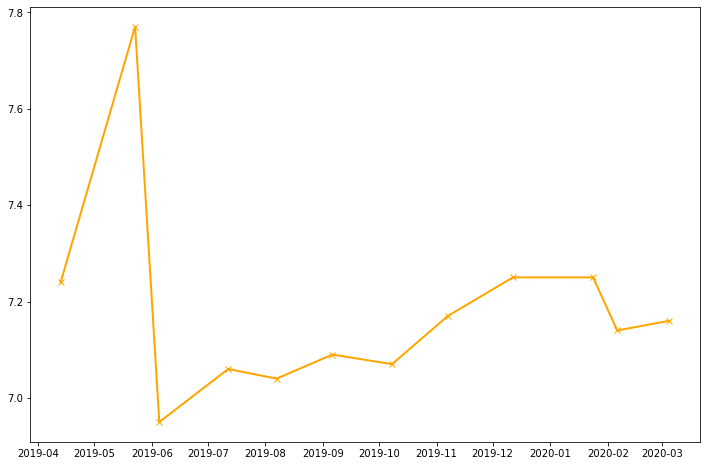

In [21]:
# get dates in the datetime.date (seems to be a better format for plotting than time stamps)
d = df1['Date'].apply(lambda x: date(x.year, x.month, x.day)) # creates a df of datetime.date (could add this back onto the original array)

d = d.values # extract values to an array
ph = df1['pH'].values

# plot timeseries of ph
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (12,8))

# ax1b = ax1.twinx() # for plotting on secondary y axis

ax1.plot(d, ph, c='orange', marker='x', lw=2, ls='-')


# # ax1b.plot(d, ec, c='orange', marker='x', lw=2, ls='-')
# # ax2.plot(d, ec, c='brown', marker='x', lw=2, ls='-')

# ax1.tick_params(labelbottom=False) # turn off x tick labels on ax1
# ax2.tick_params(axis='x', labelrotation=70, labelsize = 14)

# # set axes titles
# fs = 20
# ax1.set_ylabel('Temp (C', fontsize=fs)
# ax1b.set_ylabel('EC (mS/cm)', fontsize=fs)
# ax2.set_ylabel('pH', fontsize=fs)


# Read in all of the site data and create a dictionary of dataframes

In [8]:
codedir = os.getcwd() # set current working (where this code is) as a variable
datadir = os.path.join(codedir, 'sitedata') # nested

datafiles = ['data_site1-2.xlsx','data_site3-4.xlsx'] # list of excel datasheets to read in  
site_dfs = {} # empty dictionary to input site data into 

for f in datafiles:
    fpath = os.path.join(datadir,f)
    df = pd.read_excel(fpath,sheet_name='Sheet1')

    # use re module to extract site number from the file name (str)
    pattern = '([0-9])'
    sitenums = re.findall(pattern, f)

    # extract data from specifc site
    for s in sitenums:
        sitename = 'site%s' % s 
        df_s = df[df.location == sitename] # extract data with location = sitename
        df_name = 'df%s' % s # create a name for the new dataframe 
        site_dfs[df_name] = df_s


# Extract some of the data from site 2

In [3]:

print(site_dfs.keys()) # print the names of the dfs to the console for visual inspection


dict_keys(['df1', 'df2', 'df3', 'df4'])


In [4]:
df2 = site_dfs['df2']

# get the format of the data
type(df2['Date'].iloc[0])

# get dates in the datetime.date (seems to be a better format for plotting than time stamps)
d = df2['Date'].apply(lambda x: date(x.year, x.month, x.day)) # creates a df of datetime.date (could add this back onto the original array)
d = d.values # extract values to an array

# get temp, ec, ph data
temp = df2['Temp C'].values
ec = df2['EC (mS/cm)'].values
ph = df2['pH'].values


# Plot the data

Text(0, 0.5, 'pH')

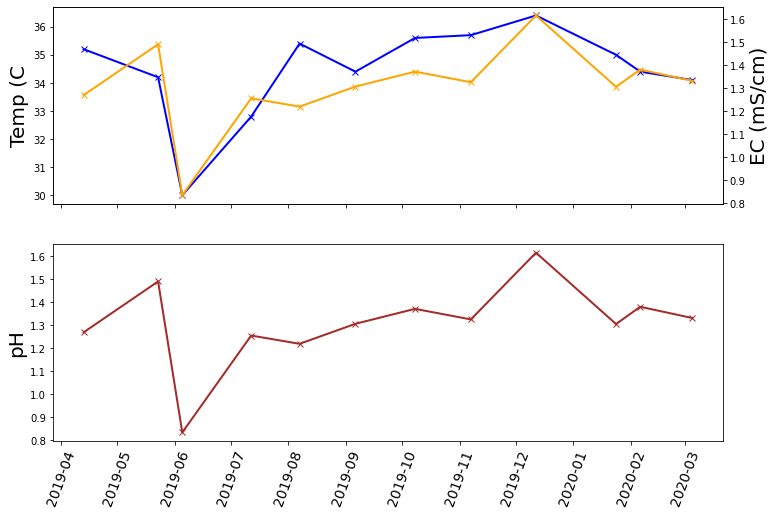

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (12,8))

ax1b = ax1.twinx() # for plotting on secondary y axis
ax1.plot(d, temp, c='blue', marker='x', lw=2, ls='-')
ax1b.plot(d, ec, c='orange', marker='x', lw=2, ls='-')
ax2.plot(d, ec, c='brown', marker='x', lw=2, ls='-')

ax1.tick_params(labelbottom=False) # turn off x tick labels on ax1
ax2.tick_params(axis='x', labelrotation=70, labelsize = 14)

# set axes titles
fs = 20
ax1.set_ylabel('Temp (C', fontsize=fs)
ax1b.set_ylabel('EC (mS/cm)', fontsize=fs)
ax2.set_ylabel('pH', fontsize=fs)

In [6]:
# Save the plot

# if there is no file dir 'figures' then create open
figdir = os.path.join(codedir, 'figures')

if os.path.isdir(figdir) == False:  
    figdir = os.makedirs(figdir)

pltname = 'site2timeseries.png' # format inferred from extension 
fname = os.path.join(figdir,pltname)
fig.savefig(fname)
# fig.savefig()